# Which type is your pokémon? - a denoising autoencoder approach

The goal of this notebook is to predict the type of the pokémon. Before training a classifying model, we will develop a denoising autoencoder to pretrain our classifier. The autoencoder will receive images with noise and will try to tranform them back to the original images. It will learn the features of our training data, so we can use the lower layers (the encoder) to train our classifier. Than we will compare a model with and without this approach, and see if it improves our accuracy. Let's start!

## Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import os

## Reading Data

In [2]:
IMAGES_PATH = "../input/pokemon-images-and-types/images/images"
CSV_PATH = "../input/pokemon-images-and-types/pokemon.csv"

In [3]:
types = pd.read_csv(CSV_PATH)
types.sort_values(by="Name", inplace=True)
types.reset_index(inplace=True, drop=True)
types.Type2.fillna("None", inplace=True)
types.head()

,Name,Type1,Type2
0,abomasnow,Grass,Ice
1,abra,Psychic,None
2,absol,Dark,None
3,accelgor,Bug,None
4,aegislash-blade,Steel,Ghost


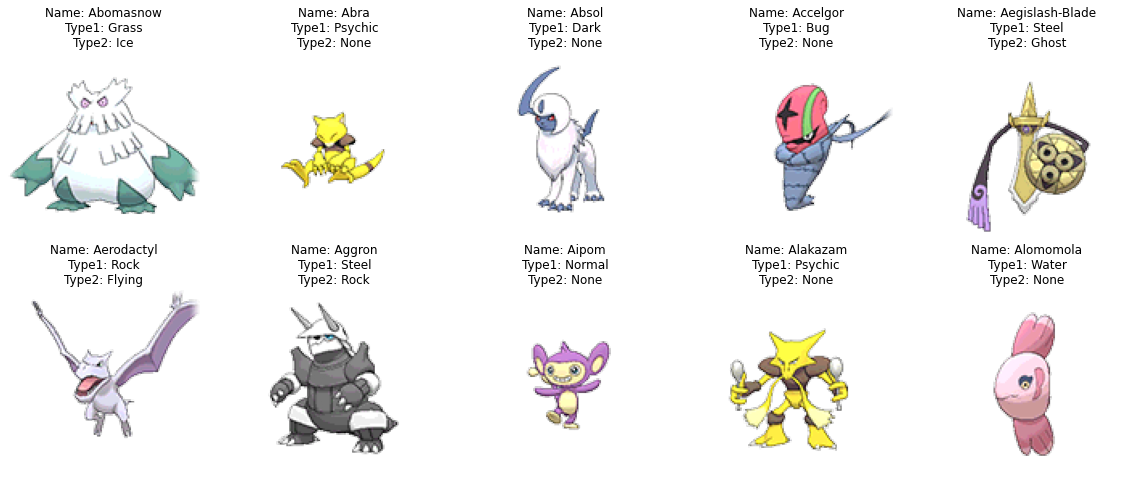

In [4]:
dir_imgs = os.listdir(IMAGES_PATH)
dir_imgs.sort()

fig, ax = plt.subplots(2, 5, figsize=(20,8))
for i in range(0,10):
    img = plt.imread(os.path.join(IMAGES_PATH, dir_imgs[i]))
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Name: %s\nType1: %s\nType2: %s" %(types.loc[i, "Name"].title(),
                                                              types.loc[i, "Type1"].title(),
                                                              types.loc[i, "Type2"].title()))
    